In [ ]:
# Carga librerías

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Paso 1. Cargar conjunto de datos

In [ ]:
df = pd.read_csv("weather_classification_data.csv")

##Paso 2. Visualización de una Muestra

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
target = df['Weather Type'].unique()
target

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [ ]:
df.shape

(13200, 11)

## Paso 3. Normalización datos

In [ ]:
df = df.dropna()

# Inicializar LabelEncoder
label_encoders = {}

# Codificar las columnas 'Cloud Cover', 'Season', 'Location' y 'Weather Type' con LabelEncoder
columns_to_encode = ['Cloud Cover', 'Season', 'Location','Weather Type']

for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Weather Type', axis=1)  # Features
y = df['Weather Type']  # Target

## Paso 4. Construcción del modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_val, X_val_test, y_val, y_val_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
#Crear una instancia de un modelo secuencial de Keras
model = keras.models.Sequential ()

In [ ]:
# Añadir capas y activación
print(X_train.shape[1])
model.add(keras.layers.Dense(64,input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.2))
# Añadir una capa de salida con 4 neuronas (una para cada clase) y activación softmax
model.add(keras.layers.Dense (4, activation='softmax'))

10


## Paso 5. Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Paso 6. Entrenamiento del Modelo

In [ ]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=140, batch_size=32, validation_data=(X_val_test, y_val_test))

Epoch 1/140
289/289 [==============================] - 4s 7ms/step - loss: 9.7661 - accuracy: 0.5201 - val_loss: 0.7365 - val_accuracy: 0.7724
Epoch 2/140
289/289 [==============================] - 2s 9ms/step - loss: 0.8290 - accuracy: 0.7128 - val_loss: 0.6678 - val_accuracy: 0.8008
Epoch 3/140
289/289 [==============================] - 3s 10ms/step - loss: 0.7737 - accuracy: 0.7293 - val_loss: 0.6251 - val_accuracy: 0.7862
Epoch 4/140
289/289 [==============================] - 2s 7ms/step - loss: 0.7188 - accuracy: 0.7509 - val_loss: 0.5822 - val_accuracy: 0.8083
Epoch 5/140
289/289 [==============================] - 2s 6ms/step - loss: 0.6872 - accuracy: 0.7647 - val_loss: 0.5618 - val_accuracy: 0.8379
Epoch 6/140
289/289 [==============================] - 2s 6ms/step - loss: 0.6779 - accuracy: 0.7614 - val_loss: 0.5390 - val_accuracy: 0.8327
Epoch 7/140
289/289 [==============================] - 2s 6ms/step - loss: 0.7394 - accuracy: 0.7240 - val_loss: 0.5419 - val_accuracy: 0.848

## Paso 7. Evaluación del modelo

124/124 [==============================] - 0s 1ms/step


<Figure size 800x600 with 0 Axes>

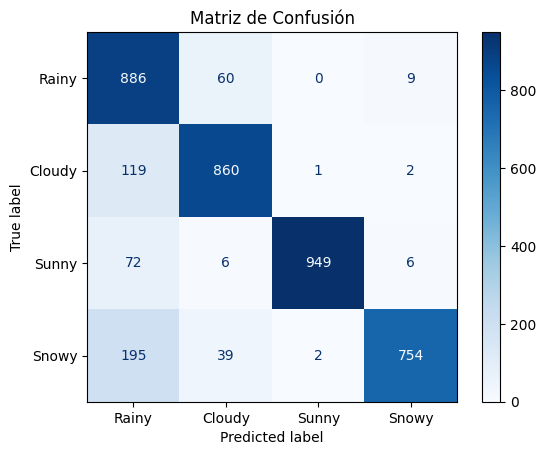

Predicted labels:  [3 0 3 ... 2 3 3]
F1-score:  0.8744660327482962


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Rainy', 'Cloudy', 'Sunny', 'Snowy'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Evaluar el modelo
print('Predicted labels: ', y_pred)
print('F1-score: ', f1_score(y_test, y_pred, average='weighted'))

## Paso 7. Gráficas Pérdida y Precisión

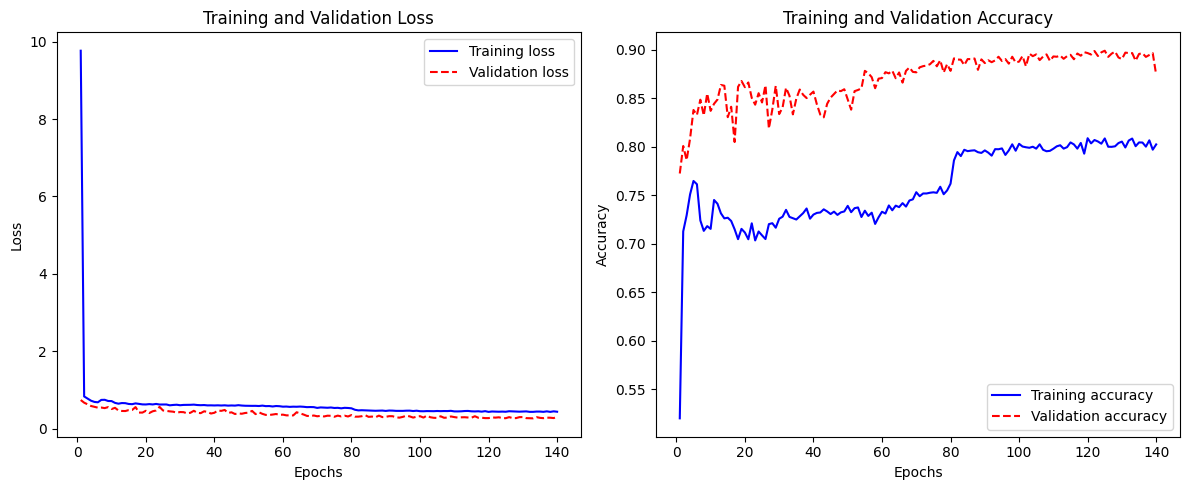

In [ ]:
# Obtener registros de historia de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Paso 8. Predicción de una muestra

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print ("Perdida en el conjunto de prueba:", loss)
print ("Precisión en el conjunto de prueba:", accuracy)

124/124 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8710
Perdida en el conjunto de prueba: 0.3058195114135742
Precisión en el conjunto de prueba: 0.8709595799446106


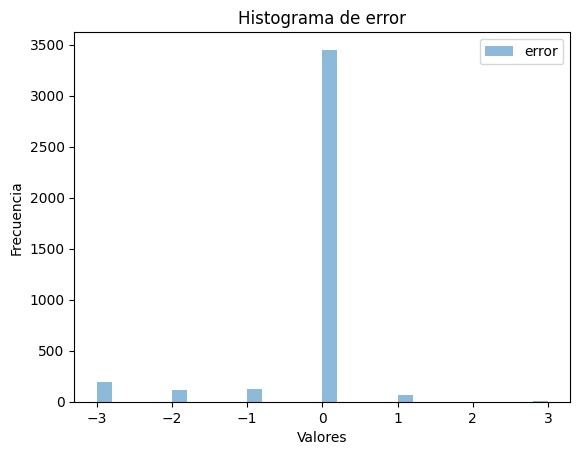

In [ ]:
error = y_pred-y_test
# Graficar el histograma de y_pred
plt.hist(error, bins=30, alpha=0.5, label='error')

# Añadir títulos y etiquetas
plt.title('Histograma de error')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()